<h1>News Sentiment Analysis</h1>

<h3><i>Trends</i></h3>
***
<ul>

<li><b><u>General Sentiment of Media Tweets</b></u>:   Overall, most tweets for all media soruces, tend to be neutral.
<li><b><u>CNN Overall Tweet Polarity</b></u>  Based on the Vader Sentiment Analysis, CNN tends to have the most neutral tweets(compared to BBC, CBS, FoxNews, and New York Times).</li>
<li><b><u>BBC Overall Tweet Polarity</b></u>  Based on the Vader Sentiment Analysis, BBC tends to tweet negative updates.</li>
</ul>


In [1]:
# Dependencies
import tweepy
import json
import numpy as np
import time
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import os
from config import ck, cs, at, ats

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys 
consumer_key = ck
consumer_secret =cs
access_token = at
access_token_secret = ats

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


In [2]:
# Target Search Term
target_terms = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# List for tweet data
table_dict = []
# Loop through all targets
for target in target_terms:
    counter=101
    public_tweets = api.user_timeline(target, count=100, result_type="recent")
#     tweetstorage[target]= public_tweets
    for tweet in public_tweets:

        # Run VAnalysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweetorder=counter-1
        counter=counter-1
        #Temp store other values
        date=time.strftime('%m/%d/%Y', time.strptime(tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        text=(tweet["text"])
        name=(tweet["user"]["name"])

        #append value to DataFrame
        table_dict.append({"Media Sources":name,"Tweet Polarity":compound,"Positive":pos,"Neutral":neu,
                          "Date":date,"Text":text,"Tweets Ago":tweetorder})
        
table_dict=pd.DataFrame(table_dict)
table_dict.head()


,Date,Media Sources,Neutral,Positive,Text,Tweet Polarity,Tweets Ago
0,09/18/2017,BBC News (UK),0.769,0.0,"Nerf guns can lead to serious eye injuries, do...",-0.1779,100
1,09/18/2017,BBC News (UK),0.652,0.0,Housing money wasted 'propping up rents' https...,-0.4939,99
2,09/18/2017,BBC News (UK),0.738,0.0,Strictly Come Dancing: Judge Rinder rejects sa...,-0.4939,98
3,09/18/2017,BBC News (UK),0.745,0.0,Fire crews tackle White Hart Lane blaze https:...,-0.3400,97
4,09/18/2017,BBC News (UK),1.000,0.0,UK 'biggest audience' in Europe for jihadist w...,0.0000,96


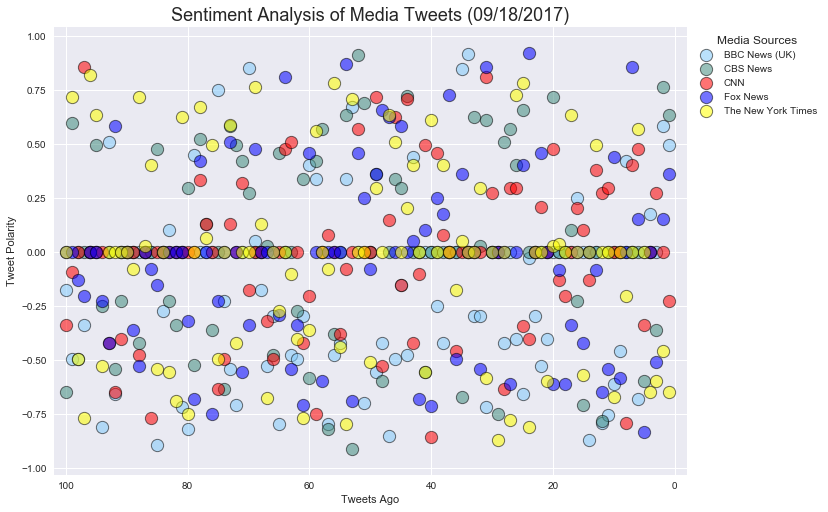

In [3]:
#create lmplot using seasborn
#set colorlist for charts
clrlist = ["#82CAFA", "#438D80", "#FF0000", "#0000FF", "#FFFF00"]
sns.set_palette(clrlist)

#create chart
MediaTweetAnalysis=sns.lmplot(x="Tweets Ago", y="Tweet Polarity", data= table_dict, 
           hue="Media Sources",  size=7, aspect=1.4 ,
           legend_out = True, legend = False, 
           scatter_kws={"s":150, 
                        'alpha':.55,'edgecolors':"black", 'linewidth':1},ci=0, fit_reg=False, )

plt.xlim(102,-2)
plt.title("Sentiment Analysis of Media Tweets ("+str(table_dict["Date"][2])+")", fontsize=18)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, title="Media Sources")
plt.savefig("Output/NSA_MediaTweets.png", bbox_inches='tight')
plt.show(MediaTweetAnalysis)


In [4]:
#create dataframe for using groupby
table_dict1 = pd.DataFrame(table_dict.groupby(["Media Sources"])["Tweet Polarity"].mean()).reset_index()
table_dict1

,Media Sources,Tweet Polarity
0,BBC News (UK),-0.158586
1,CBS News,0.028105
2,CNN,-0.014255
3,Fox News,-0.031941
4,The New York Times,-0.025146


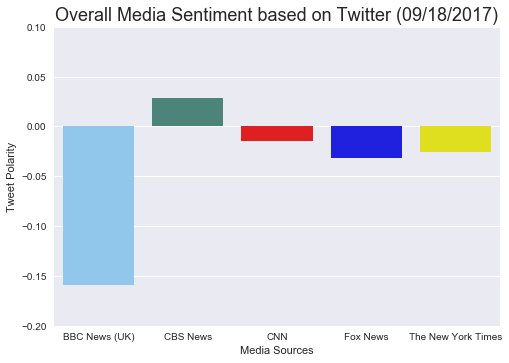

In [5]:
#create barplot using seaborn
MediaSent_O=sns.barplot(x="Media Sources", y="Tweet Polarity", data=table_dict1)
plt.ylim(-.2,.1)
plt.ylabel('Tweet Polarity')
plt.title("Overall Media Sentiment based on Twitter ("+str(table_dict["Date"][2])+")", fontsize=18)
plt.savefig("Output/NSA_OverallSentiment.png", bbox_inches='tight')
plt.show(MediaSent_O)


In [6]:
#export dataframe to csv file
table_dict.to_csv('Output/newsanalysis.csv', index=False)
